## n-step SARSA

Dans ce notebook, nous allons combiner la méthode SARSA avec le bootstrapping à n étapes. L'algorithme résultant est appelé SARSA à n étapes et utilise la cible suivante pour les mises à jour :

\begin{equation}
\hat G_t = R_{t+1} + \gamma R_{t+2} + \cdots + \gamma^{n-1} R_{n} + \gamma Q(S_n, A_n)
\end{equation}
    
Cette une méthode qui suit une stratégie *on-policy*, dans laquelle la politique optimisée est aussi responsable de parcourir l'environnement.

## Gérer les imports

In [ ]:
import gym
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython import display

from bucket_env import BucketEnv3
from bucket_env import plot_stats, testing, rendering
%matplotlib inline

## Initialiser l'environnement
Pour créer l'environnement, il faut simplement créer une instance de `BucketEnv3`

In [ ]:
env = BucketEnv3()

In [ ]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title("Etat initial")
plt.imshow(frame)

In [ ]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

## Definition de la table de valeurs $Q(s, a)$

#### Création de la table $Q(s, a)$
Cette table doit permettre de lier chaque état à une action.
Pour cela, on utilise la librairie `numpy` pour créer un tableau avec une forme (*shape*) correspondant à cette paire.
La forme attendu est donnée par un tuple.

Exemple
```python
>>> s = (2,2)
>>> np.zeros(s)
array([[ 0.,  0.],
       [ 0.,  0.]])
```


In [ ]:
action_values = np.zeros((7,7,7) + (5,))

## Définition d'une politique $\pi(s)$

#### Création de la politique $\pi(s)$

In [ ]:
def policy(state, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Tester la politique avec l'état (0, 0, 0)

In [ ]:
policy((0, 0, 0))

## Implementation de l'algorithme

</br>

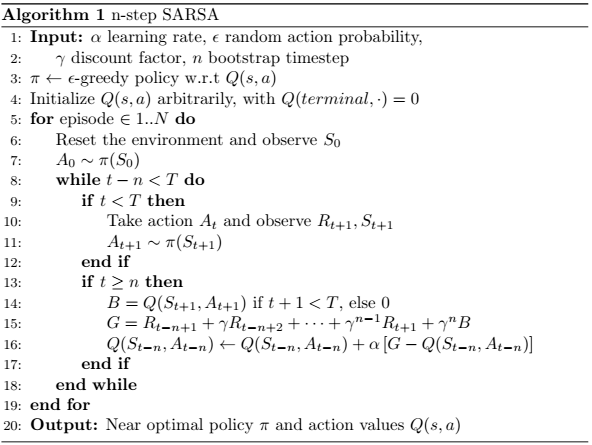
</br>
<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>



In [ ]:
def n_step_sarsa(policy, action_values, episodes, alpha = 0.1, gamma=0.99, epsilon=0.2, n=8):
    stats = {'Returns': []}
    for episode in tqdm(range(1, episodes + 1)):
        state = env.reset()
        action = policy(state, epsilon)
        transitions = []
        done = False
        t = 0
        ep_return = 0
        while t - n < len(transitions):
            # execute an action in the environment
            if not done:
                next_state, reward, done, _ = env.step(action)
                ep_return += reward
                next_action = policy(next_state, epsilon) if not done else None
                transitions.append([state, action, reward])              
                 
            # update q-value estimates
            if t >= n: 
                # G = r1 + gamma * r2 + gamma^2 * r3 +...+ gamma^n * Q(Sn, An)
                G = action_values[next_state][next_action] if not done else 0.
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward_t + gamma * G
                action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])
            
            t += 1
            state = next_state
            action = next_action
        stats['Returns'].append(ep_return)
    return stats

In [ ]:
stats = n_step_sarsa(policy, action_values, episodes=4000, epsilon=.2)

In [ ]:
plot_stats(stats)

In [ ]:
testing(env, action_values)

In [ ]:
rendering(env, policy)